In [1]:
import pandas as pd

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441


In [3]:
confirmed.shape

(275, 492)

In [4]:
last_date = "5/13/21"
confirmed[last_date]

0       63045
1      131890
2      124889
3       13470
4       29695
        ...  
270      3740
271    303270
272      6507
273     92262
274     38491
Name: 5/13/21, Length: 275, dtype: int64

In [5]:
# valor falso pois o erro é muito grande
# não vou considerar essa análise pois tem muito campo vazio (muita disparidade no padrão)

confirmed['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Tajikistan         1
Maldives           1
Georgia            1
Saint Lucia        1
US                 1
Name: Country/Region, Length: 192, dtype: int64

In [6]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441
Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,...,1240,1241,1241,1251,1251,1252,1255,1255,1257,1257
Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,...,3269466,3290935,3307285,3335965,3371508,3411160,3447044,3482512,3514683,3539484
Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,...,220447,220729,220860,220927,221139,221368,221559,221699,221880,221948
Australia,-256.85020,1130.843900,0,0,0,0,4,5,5,6,...,29964,29975,29978,29983,29992,29995,29999,30003,30007,30019


In [7]:
country = 'China'

In [8]:
confirmed_by_country.loc[country][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
5/19/21    102797.0
5/20/21    102822.0
5/21/21    102833.0
5/22/21    102853.0
5/23/21    102873.0
Name: China, Length: 488, dtype: float64

In [9]:
import matplotlib.pyplot as plt

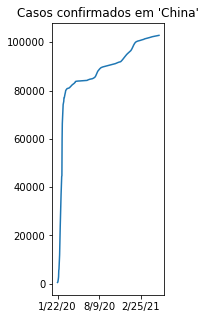

In [10]:
# grafico extremamente apertado, estamos sendo longe do adequado em passar uma mensagem errada

plt.figure(figsize=(2,5))
confirmed_by_country.loc[country][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.show()

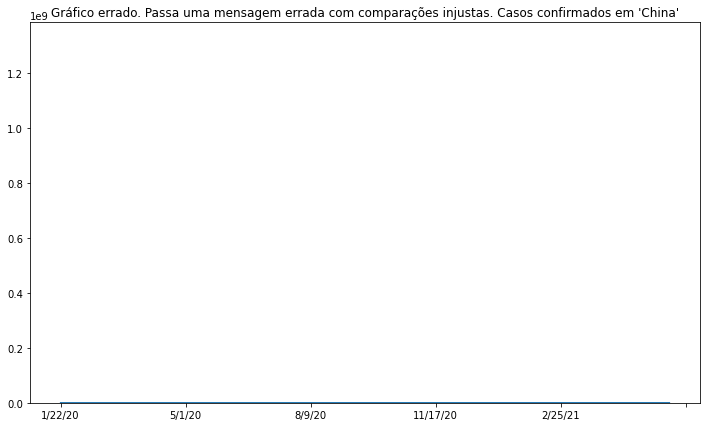

In [11]:
# comparando o momento inicial com 1.386 bi (população da China 2017)

plt.figure(figsize=(12,7))
confirmed_by_country.loc[country][2:].plot()
plt.title("Gráfico errado. Passa uma mensagem errada com comparações injustas. Casos confirmados em 'China'")
plt.ylim(0, 1386000000)
plt.show()

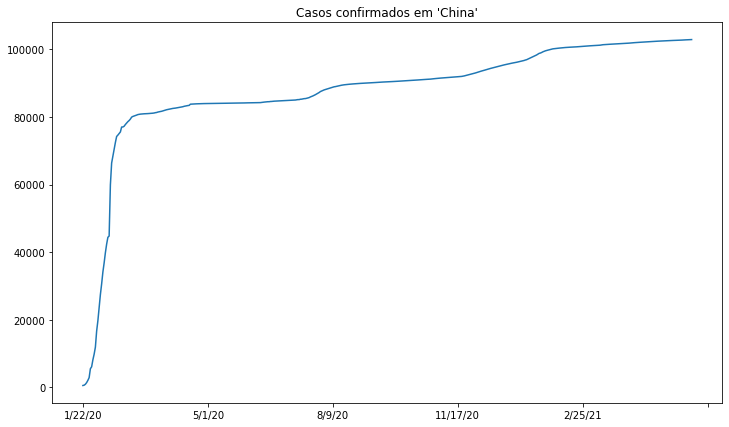

In [12]:
# tentando comparar o crescimento do momento inicial ao momento atual

plt.figure(figsize=(12,7))
confirmed_by_country.loc[country][2:].plot()
plt.title("Casos confirmados em 'China'")
plt.show()

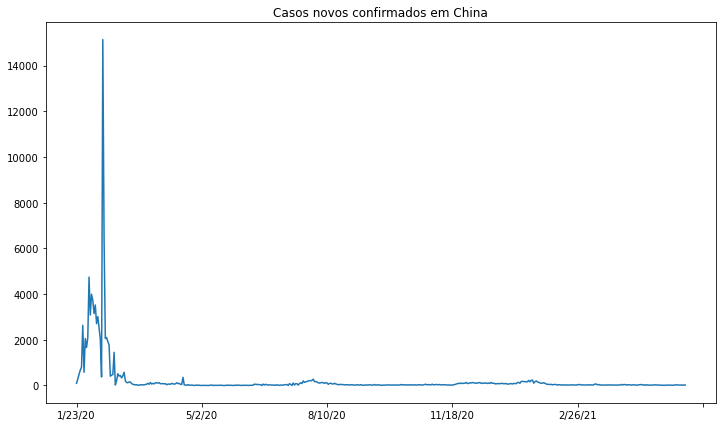

In [13]:
new_cases_country = confirmed_by_country.loc[country][2:].diff().dropna()

plt.figure(figsize=(12,7))
plt.title(f'Casos novos confirmados em {country}')
new_cases_country.plot()
plt.show()

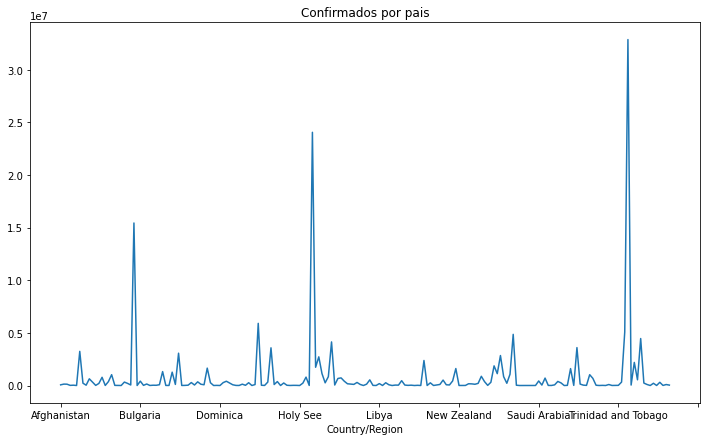

In [14]:
plt.figure(figsize=(12,7))
confirmed_by_country[last_date].plot()
plt.title('Confirmados por pais')
plt.show()

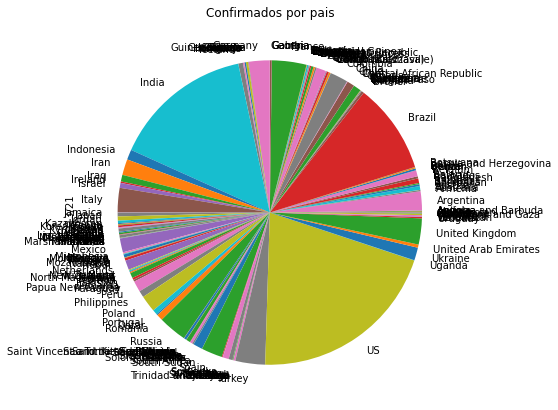

In [15]:
# 99,99% das vezes não devemos usar gráfico de pizza

# 1- Muitas categorias, inviável
# 2- Poucas categorias, a comparação é de área!

plt.figure(figsize=(12,7))
confirmed_by_country[last_date].plot(kind='pie')
plt.title('Confirmados por pais')
plt.show()

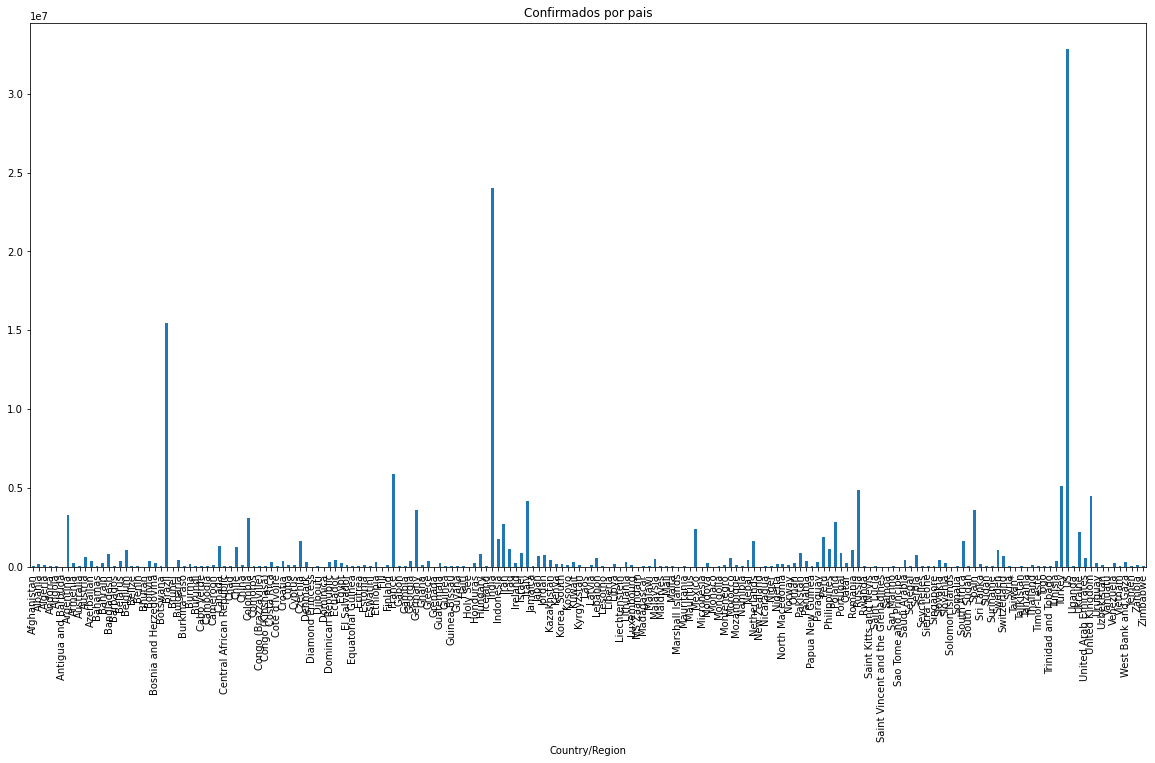

In [16]:
plt.figure(figsize=(20,10))
confirmed_by_country[last_date].plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

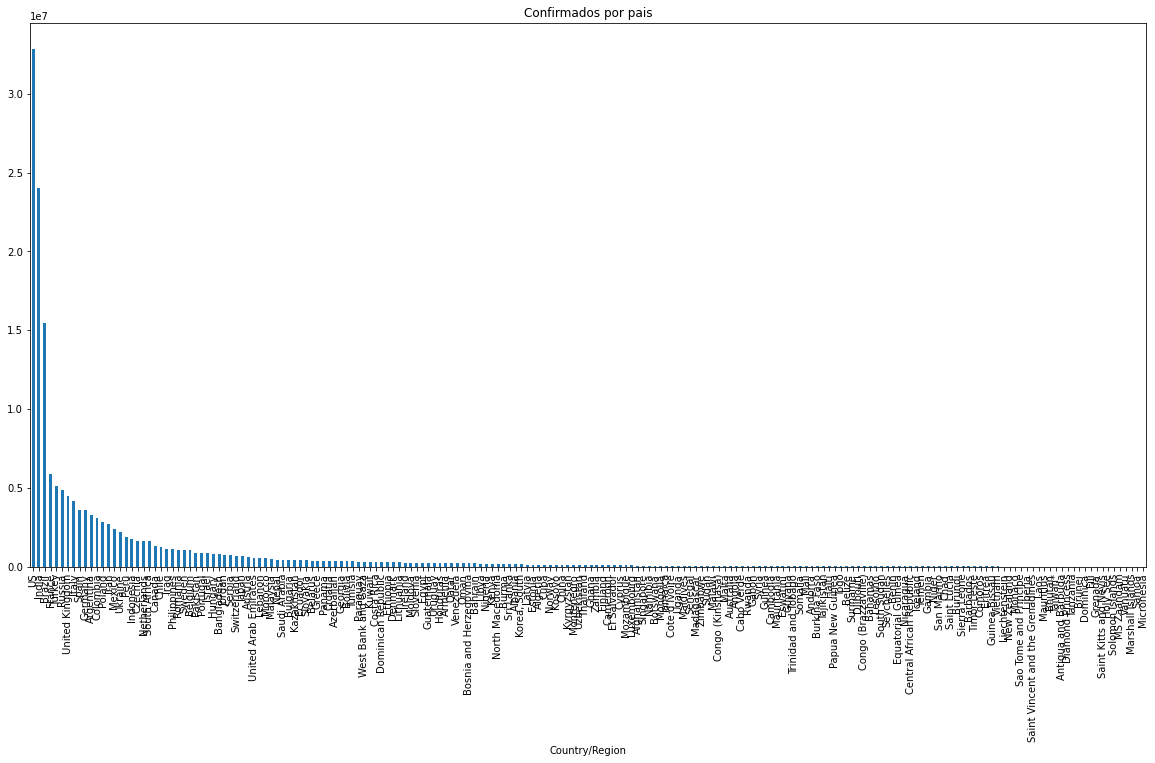

In [17]:
plt.figure(figsize=(20,10))
confirmed_by_country[last_date].sort_values(ascending=False).plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

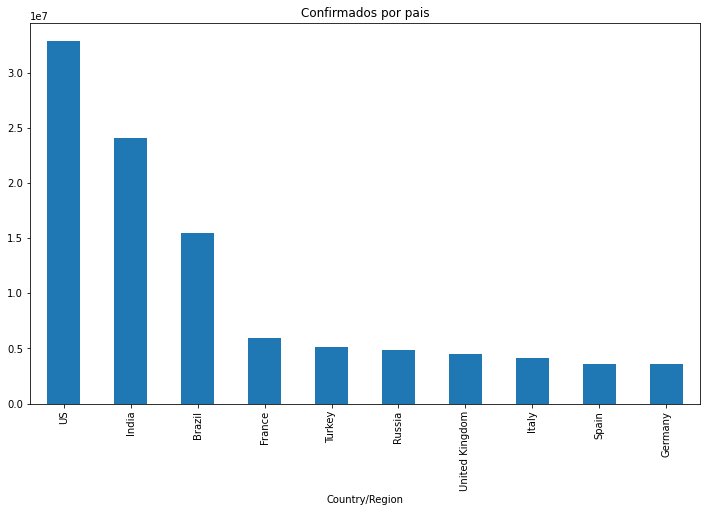

In [18]:
plt.figure(figsize=(12,7))
confirmed_by_country[last_date].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

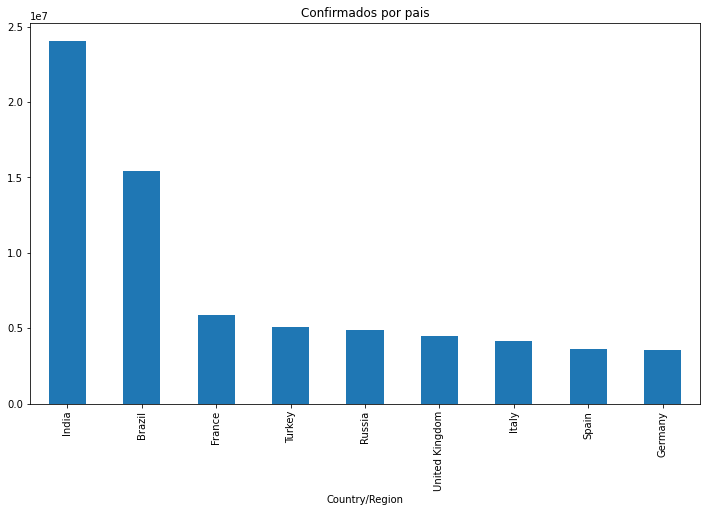

In [19]:
plt.figure(figsize=(12,7))
confirmed_by_country[last_date].sort_values(ascending=False)[1:10].plot(kind='bar')
plt.title('Confirmados por pais')
plt.show()

In [20]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2730,2733,2742,2745,2751,2762,2772,2782,2792,2802
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2427,2429,2432,2435,2436,2438,2440,2441,2442,2444
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3360,3366,3374,3381,3388,3395,3401,3405,3411,3418
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,651,655,659,677,685,696,704,709,715,725


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54634,54663,54686,55010,55118,55529,55687,55790,55889,56035
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,122105,123081,124312,125419,126405,127240,127869,128425,128601,128732
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87137,87251,87359,87476,87609,87746,87902,88066,88208,88346
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13155,13155,13155,13211,13234,13234,13234,13234,13234,13234
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25650,25703,25715,25995,26013,26458,26483,26513,26775,26778


In [21]:
def latest_by_country(data):
    return data.groupby('Country/Region').sum().iloc[:,-1]

def latest_by_country_at(data, date):
    return data.groupby('Country/Region').sum()[date]

In [22]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ['Confirmados', 'Mortos', 'Recuperados']
combined

,Confirmados,Mortos,Recuperados
Country/Region,,,
Afghanistan,65728,2802,56035
Albania,132209,2444,128732
Algeria,126860,3418,88346
Andorra,13569,127,13234
Angola,32441,725,26778
...,...,...,...
Vietnam,5275,43,2721
West Bank and Gaza,305201,3459,297201
Yemen,6658,1307,3245


In [23]:
informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ['Confirmados', 'Mortos', 'Recuperados']
combined_2_20_20

,Confirmados,Mortos,Recuperados
Country/Region,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
Andorra,0,0,0
Angola,0,0,0
...,...,...,...
Vietnam,16,0,7
West Bank and Gaza,0,0,0
Yemen,0,0,0


In [24]:
# taxa de letalidade expressa em %
# número de casos letais dentro dos casos que foram letais e não letais

sum_up = combined.sum()
taxa_letalidade_1 = sum_up['Mortos'] / sum_up['Confirmados']
taxa_letalidade_2 = sum_up['Mortos'] / (sum_up['Recuperados'] + sum_up['Mortos'])
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade 1 é {(taxa_letalidade_1 * 100):.2f}%")
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade 2 é {(taxa_letalidade_2 * 100):.2f}%")

No conjunto de dados que estamos utilizando a taxa de letalidade 1 é 2.08%
No conjunto de dados que estamos utilizando a taxa de letalidade 2 é 3.24%


In [25]:
sum_up = combined_2_20_20.sum()
taxa_letalidade_1 = sum_up['Mortos'] / sum_up['Confirmados']
taxa_letalidade_2 = sum_up['Mortos'] / (sum_up['Recuperados'] + sum_up['Mortos'])
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade 1 é {(taxa_letalidade_1 * 100):.2f}%")
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade 2 é {(taxa_letalidade_2 * 100):.2f}%")

No conjunto de dados que estamos utilizando a taxa de letalidade 1 é 2.95%
No conjunto de dados que estamos utilizando a taxa de letalidade 2 é 11.01%


In [26]:
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ['Confirmados', 'Mortos', 'Recuperados']

sum_up = combined_12.sum()
taxa_letalidade_1 = sum_up['Mortos'] / sum_up['Confirmados']
print(f"No conjunto de dados que estamos utilizando a taxa de letalidade 1 é {(taxa_letalidade_1 * 100):.2f}%")

No conjunto de dados que estamos utilizando a taxa de letalidade 1 é 6.05%


In [27]:
taxa_letalidade_1 = (combined['Mortos'] / combined['Confirmados']) * 100
taxa_letalidade_2 = (combined['Mortos'] / (combined['Recuperados'] + combined['Mortos'])) * 100
combined['taxa_letalidade_1'] = taxa_letalidade_1
combined['taxa_letalidade_2'] = taxa_letalidade_2
combined.head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
Afghanistan,65728,2802,56035,4.263023,4.762309
Albania,132209,2444,128732,1.848588,1.863146
Algeria,126860,3418,88346,2.694309,3.724772
Andorra,13569,127,13234,0.935957,0.950528
Angola,32441,725,26778,2.234826,2.636076
Antigua and Barbuda,1257,42,1192,3.341289,3.403566
Argentina,3539484,74063,3106949,2.092480,2.328284
Armenia,221948,4392,211057,1.978842,2.038533
Australia,30019,910,23549,3.031413,3.720512


In [28]:
combined.sort_values('taxa_letalidade_1', ascending=False).head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
Vanuatu,4,1,3,25.000000,25.000000
MS Zaandam,9,2,7,22.222222,22.222222
Yemen,6658,1307,3245,19.630520,28.712654
Mexico,2396604,221647,1914101,9.248378,10.377957
Sudan,34889,2568,27949,7.360486,8.414982
Syria,24117,1734,21549,7.189949,7.447494
Egypt,253835,14721,186678,5.799437,7.309371
Somalia,14632,767,6685,5.241935,10.292539
Ecuador,418851,20193,354499,4.821046,5.389226


In [29]:
combined.sort_values('taxa_letalidade_2', ascending=False).head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
Sweden,1058341,14366,0,1.357407,100.000000
Belgium,1048881,24842,0,2.368429,100.000000
Serbia,709939,6777,0,0.954589,100.000000
US,33117737,589893,0,1.781200,100.000000
United Kingdom,4478390,127983,15427,2.857790,89.242731
Netherlands,1653395,17817,26653,1.077601,40.065213
Spain,3636453,79620,150376,2.189496,34.617993
Yemen,6658,1307,3245,19.630520,28.712654
Vanuatu,4,1,3,25.000000,25.000000


<Figure size 864x504 with 0 Axes>

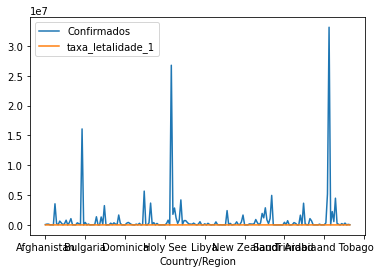

In [30]:
# Visualização horenda
plt.figure(figsize=(12,7))
combined[['Confirmados', 'taxa_letalidade_1']].plot()
plt.show()

In [31]:
import seaborn as sns

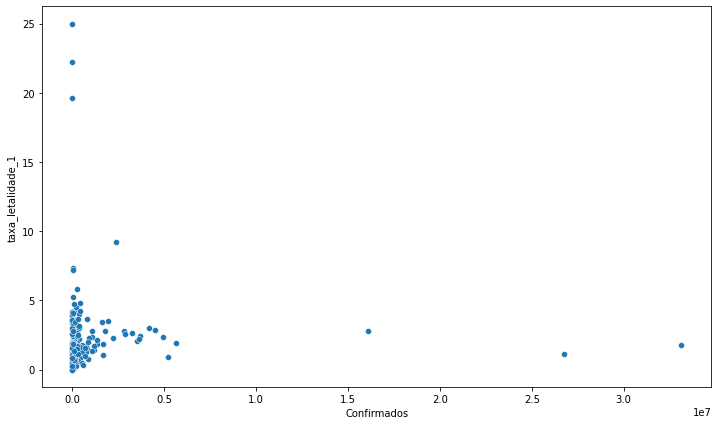

In [32]:
plt.figure(figsize=(12,7))
sns.scatterplot(data = combined, x='Confirmados', y='taxa_letalidade_1')
plt.show()

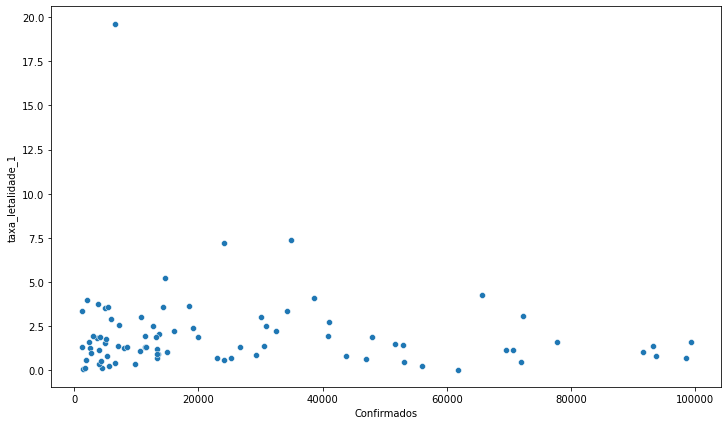

In [33]:
plt.figure(figsize=(12,7))
sns.scatterplot(data = combined.query('Confirmados > 1000 and Confirmados < 100000'), x='Confirmados', y='taxa_letalidade_1')
plt.show()

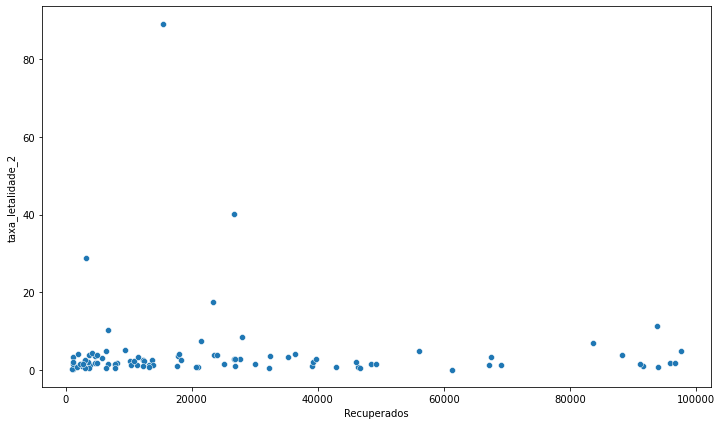

In [34]:
plt.figure(figsize=(12,7))
sns.scatterplot(data = combined.query('Recuperados > 1000 and Recuperados < 100000'), x='Recuperados', y='taxa_letalidade_2')
plt.show()

/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


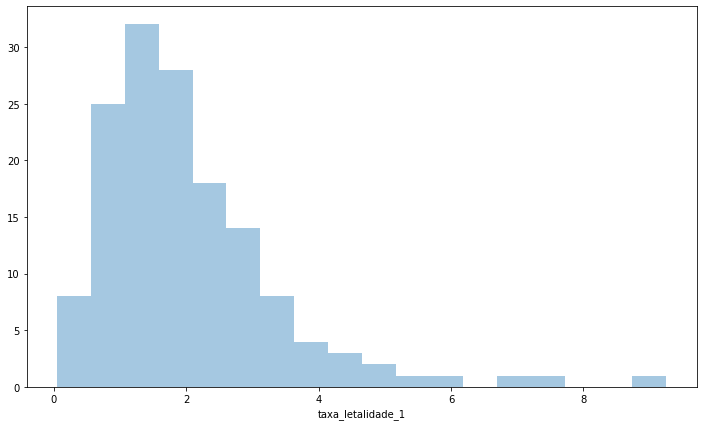

In [35]:
plt.figure(figsize=(12,7))
sns.distplot(combined.query('Confirmados > 10000')['taxa_letalidade_1'], kde=False)
plt.show()

/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


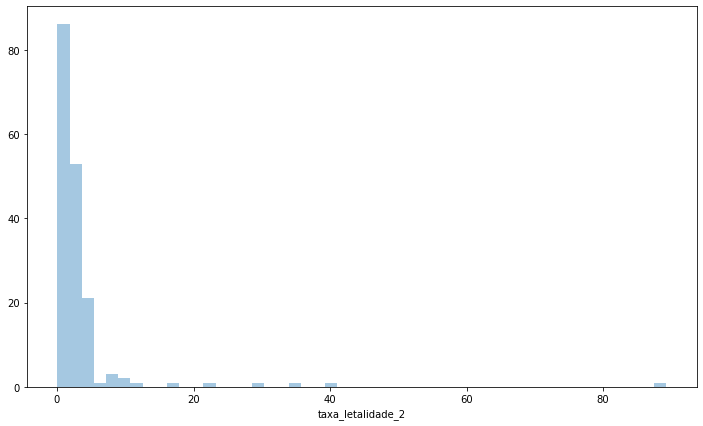

In [36]:
plt.figure(figsize=(12,7))
sns.distplot(combined.query('Recuperados > 1000')['taxa_letalidade_2'], kde=False)
plt.show()

In [37]:
combined.sort_values('taxa_letalidade_1', ascending=False).query('Confirmados > 10000').head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
Mexico,2396604,221647,1914101,9.248378,10.377957
Sudan,34889,2568,27949,7.360486,8.414982
Syria,24117,1734,21549,7.189949,7.447494
Egypt,253835,14721,186678,5.799437,7.309371
Somalia,14632,767,6685,5.241935,10.292539
Ecuador,418851,20193,354499,4.821046,5.389226
China,102873,4846,97632,4.710663,4.728820
Bosnia and Herzegovina,203150,9108,172005,4.483387,5.028905
Afghanistan,65728,2802,56035,4.263023,4.762309


In [38]:
combined.sort_values('taxa_letalidade_2', ascending=False).query('Recuperados > 1000').head(10)

,Confirmados,Mortos,Recuperados,taxa_letalidade_1,taxa_letalidade_2
Country/Region,,,,,
United Kingdom,4478390,127983,15427,2.857790,89.242731
Netherlands,1653395,17817,26653,1.077601,40.065213
Spain,3636453,79620,150376,2.189496,34.617993
Yemen,6658,1307,3245,19.630520,28.712654
France,5665101,108757,382519,1.919772,22.137658
Ireland,254870,4941,23364,1.938635,17.456280
Greece,389804,11772,93764,3.019979,11.154488
Mexico,2396604,221647,1914101,9.248378,10.377957
Somalia,14632,767,6685,5.241935,10.292539


# Segunda parte

In [39]:
confirmed.set_index('Country/Region').loc['China'].sum().tail()

5/19/21    102797
5/20/21    102822
5/21/21    102833
5/22/21    102853
5/23/21    102873
dtype: object

In [40]:
is_china = confirmed['Country/Region'] == 'China'

In [41]:
confirmed['is_china'] = is_china
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,is_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,63412,63484,63598,63819,64122,64575,65080,65486,65728,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131978,132015,132032,132071,132095,132118,132153,132176,132209,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,125194,125311,125485,125693,125896,126156,126434,126651,126860,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13510,13510,13555,13569,13569,13569,13569,13569,13569,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,30354,30637,30787,31045,31438,31661,31909,32149,32441,False


In [42]:
confirmed.query('is_china').head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,is_china
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,999,1001,1001,1001,1001,1001,1001,1002,1002,True
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,1057,1057,1057,1057,1057,1057,1057,1058,1058,True
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,598,598,598,598,598,598,598,598,598,True
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,598,598,599,599,599,610,610,612,613,True
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,193,193,193,193,193,193,193,193,194,True


In [43]:
confirmed.groupby('is_china').sum()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21
is_china,,,,,,,,,,,,,,,,,,,,,
False,4520.70925,2597.745414,9,12,21,27,43,50,69,80,...,161791512,162419009,162967186,163506857,164129026,164800105,165079493,165705357,166283132,166759187
True,1085.29230,3688.937700,548,643,920,1406,2075,2877,5509,6087,...,102696,102717,102746,102769,102784,102797,102822,102833,102853,102873


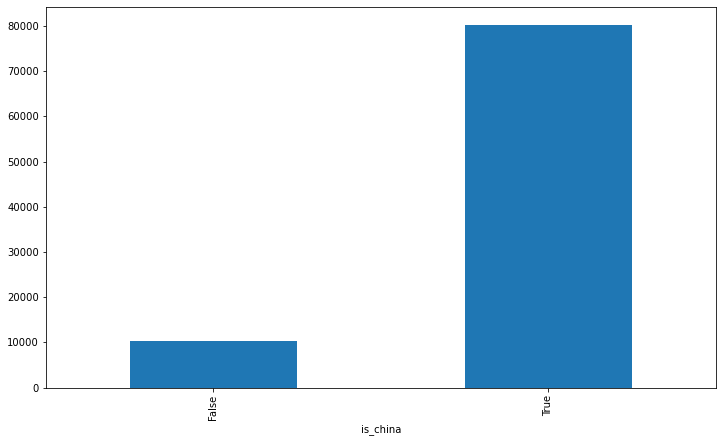

In [44]:
plt.figure(figsize=(12,7))
confirmed.groupby('is_china').sum()['3/2/20'].plot(kind='bar')
plt.show()

### No dia 02/03/2020 China teve 8 vezes o número de casos que o resto. Mas isso é até injusto pois estamos resumindo as informações, e com isso perdendo elas.

Mas olhar uma fotografia é muito limitado, queremos ver também como anda esse crescimento

In [45]:
import numpy as np

In [46]:
confirmed['is_china_label'] = np.where(confirmed['is_china'], 'China', 'Others')
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,is_china,is_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,63484,63598,63819,64122,64575,65080,65486,65728,False,Others
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132015,132032,132071,132095,132118,132153,132176,132209,False,Others
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,125311,125485,125693,125896,126156,126434,126651,126860,False,Others
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13510,13555,13569,13569,13569,13569,13569,13569,False,Others
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,30637,30787,31045,31438,31661,31909,32149,32441,False,Others


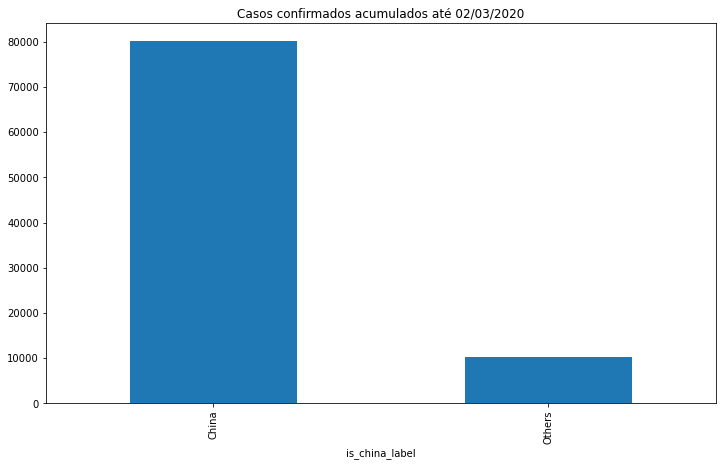

In [47]:
plt.figure(figsize=(12,7))
confirmed.groupby('is_china_label').sum()['3/2/20'].plot(kind='bar')
plt.title("Casos confirmados acumulados até 02/03/2020")
plt.show()

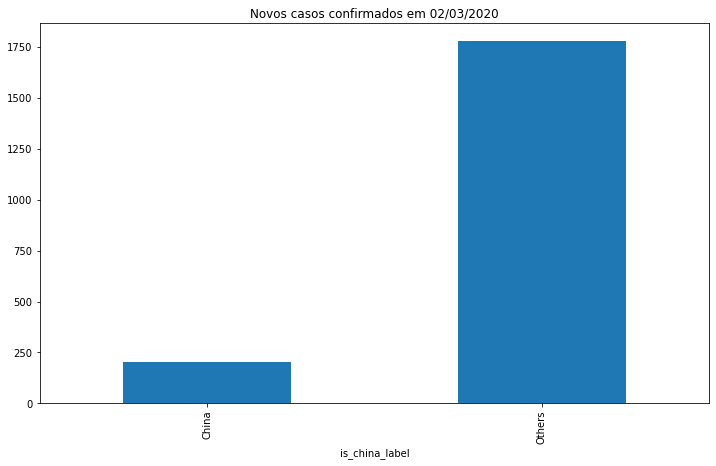

In [48]:
plt.figure(figsize=(12,7))
summed = confirmed.groupby('is_china_label').sum()
summed['delta'] = summed['3/2/20'] - summed['3/1/20']
summed['delta'].plot(kind='bar')

plt.title("Novos casos confirmados em 02/03/2020")
plt.show()

<Figure size 864x504 with 0 Axes>

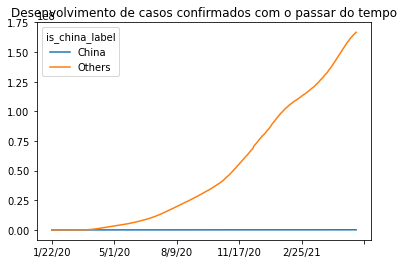

In [49]:
plt.figure(figsize=(12,7))
summed.T[2:-2].plot()
plt.title('Desenvolvimento de casos confirmados com o passar do tempo')
plt.show()

<Figure size 864x504 with 0 Axes>

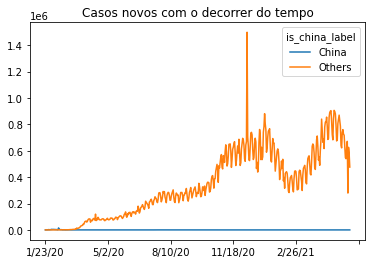

In [50]:
plt.figure(figsize=(12,7))
differences = summed.T[2:-2].diff().dropna()
differences.plot()
plt.title('Casos novos com o decorrer do tempo')
plt.show()